<a href="https://colab.research.google.com/github/Siri2191/portifolio/blob/main/client-segmentation/client_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Context</h1>

---

Dentro do mercado de marketing digital, assim como outros, a segmentação de clientes de acordo com comportamento e de extrema importância para a seleção de uma abordagem mais acertiva e com menos custos para uma empresa. 

Este exemplo demostra uma forma de fazer esta seleção o mais precisa possivel usando o modelo RFM de analise. 

Os dados foram obtidos da plataforma Kaggle. 

# Importando Bibliotecas

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime


# Lendo os dados e dando uma primeira olhada

---

In [2]:
df = pd.read_csv("BancoDeDados.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116581 entries, 0 to 116580
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   amostra               116581 non-null  int64  
 1   id_cliente            116581 non-null  object 
 2   id_unico_cliente      116581 non-null  object 
 3   item_id               116581 non-null  int64  
 4   cep_cliente           116581 non-null  int64  
 5   cidade_cliente        116581 non-null  object 
 6   estado_cliente        116581 non-null  object 
 7   id_pedido             116581 non-null  object 
 8   status_pedido         116581 non-null  object 
 9   horario_pedido        116581 non-null  object 
 10  pedido_aprovado       116567 non-null  object 
 11  pedido_entregador     115368 non-null  object 
 12  pedido_entregue       114066 non-null  object 
 13  data_estimada         116581 non-null  object 
 14  id_vendedor           116581 non-null  object 
 15  

In [4]:
df.head()

,amostra,id_cliente,id_unico_cliente,item_id,cep_cliente,cidade_cliente,estado_cliente,id_pedido,status_pedido,horario_pedido,...,pagamento_sequencial,pagamento_tipo,pagamento_prestacoes,pagamento_valor,review,categoria,categoria_ingles,cep_vendedor,cidade_vendedor,estado_vendedor
0,0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,1,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,...,1,credit_card,2,146.87,4,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP
1,1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,1,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,...,1,credit_card,1,275.79,1,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP
2,2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,2,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,...,1,credit_card,1,275.79,1,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP
3,3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,1,92480,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:26,...,1,credit_card,7,140.61,3,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP
4,4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,1,25931,mage,RJ,2e604b3614664aa66867856dba7e61b7,delivered,2018-02-03 19:45:40,...,1,credit_card,10,137.58,4,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP


In [5]:
def plot_perc(st, dados):
  plt.figure(figsize=(20,8))

  g = sns.countplot(x=st, data=dados, orient = 'h')
  g.set_ylabel('Contagem', fontsize = 17)

  sizes=[]

  for p in g.patches:
    heigth = p.get_height()
    sizes.append(heigth)
    g.text(p.get_x() + p.get_width()/1.6, 
           heigth+200, 
           '{:1.2f}%'.format(heigth/len(dados)*100), 
           ha='center', 
           va='bottom', 
           fontsize=12)
    g.set_ylim(0, max(sizes)*1.1)

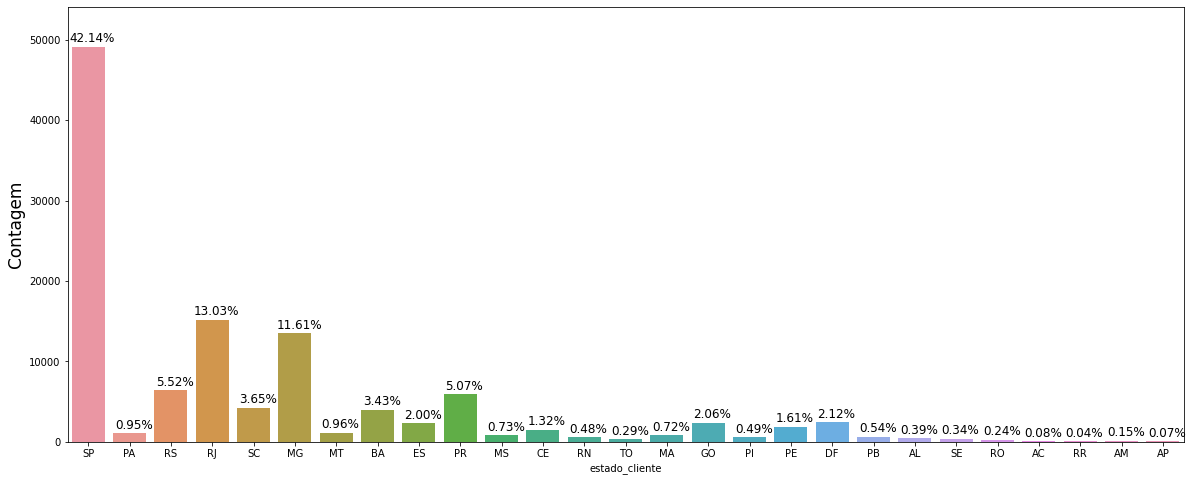

In [6]:
plot_perc('estado_cliente',df)

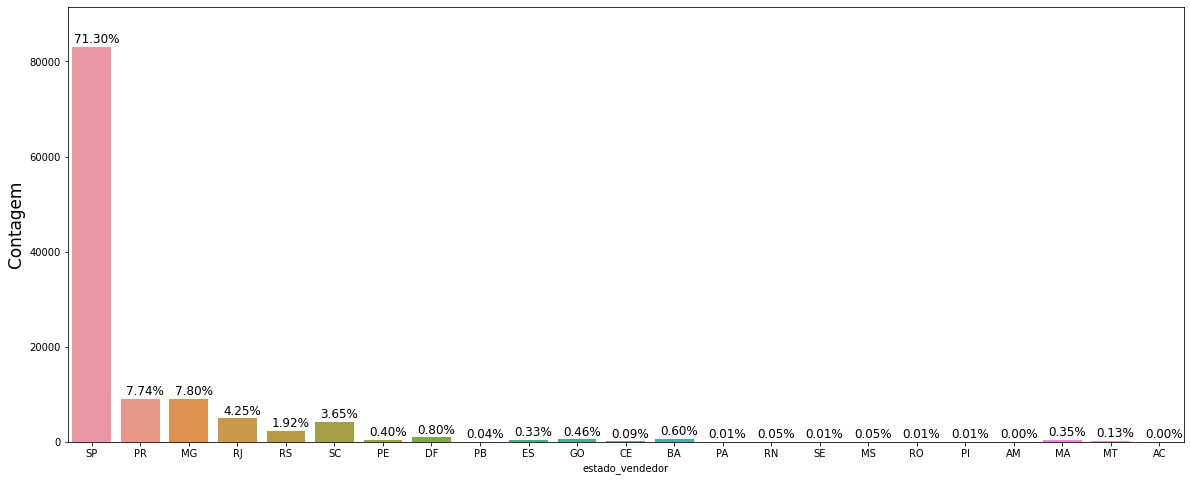

In [7]:
plot_perc('estado_vendedor',df)

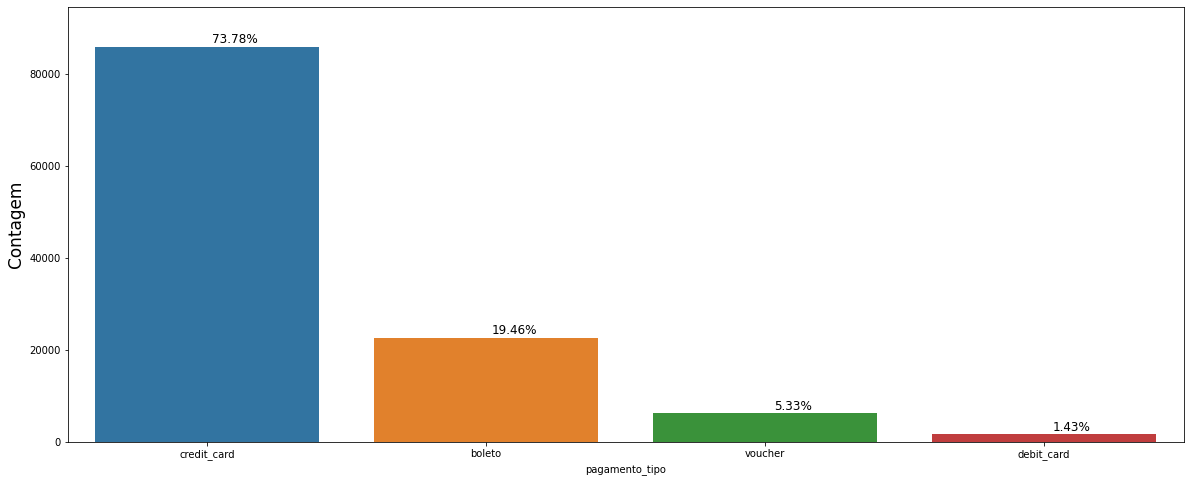

In [8]:
plot_perc('pagamento_tipo',df)

Text(0, 0.5, 'Contagem')

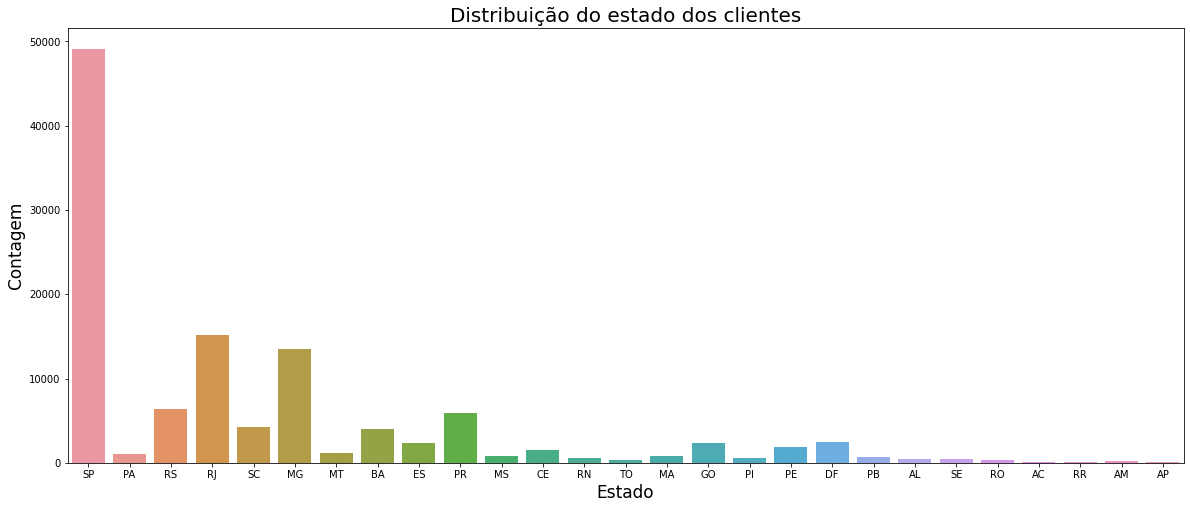

In [9]:
plt.figure(figsize=(20,8))
g = sns.countplot(x='estado_cliente', data=df, orient='h')
g.set_title("Distribuição do estado dos clientes", fontsize=20)
g.set_xlabel("Estado", fontsize=17)
g.set_ylabel("Contagem", fontsize=17)


Text(0, 0.5, 'Preço')

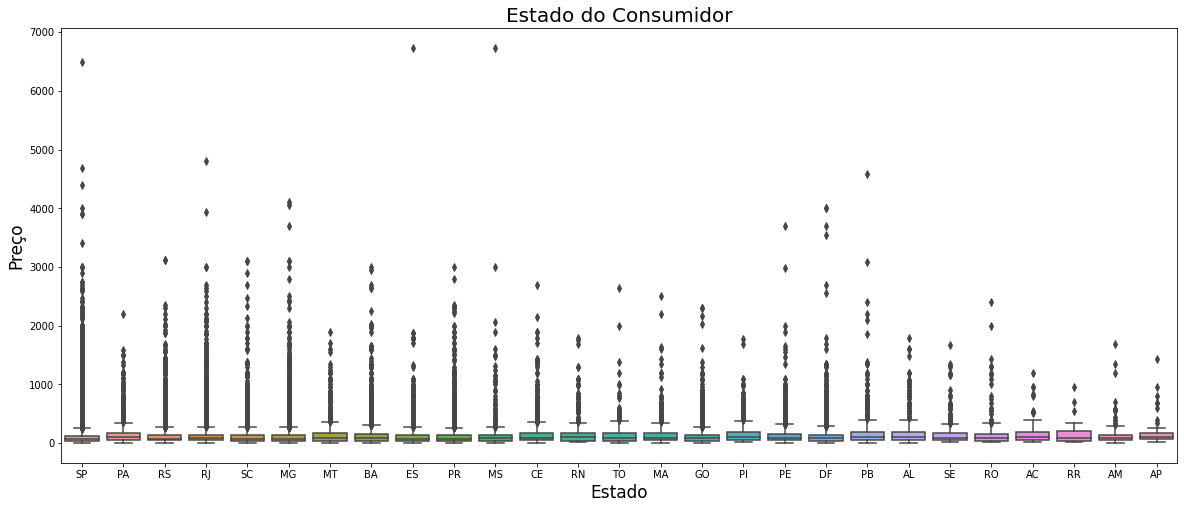

In [10]:
plt.figure(figsize=(20,8))
g2 = sns.boxplot(x='estado_cliente', y='preco',
                 data=df[df['preco'] != -1])
g2.set_title("Estado do Consumidor", fontsize=20)
g2.set_xlabel("Estado", fontsize=17)
g2.set_ylabel("Preço", fontsize=17)


Text(0, 0.5, 'Frete')

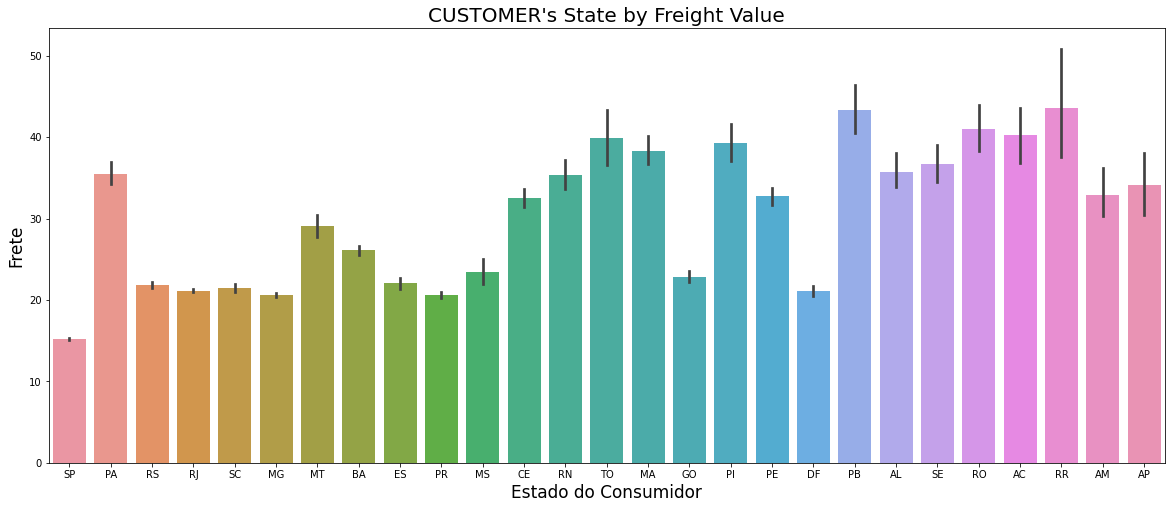

In [11]:
plt.figure(figsize=(20,8))
g3 = sns.barplot(x='estado_cliente', y='frete',
                 data=df[df['preco'] != -1])
g3.set_title("CUSTOMER's State by Freight Value", fontsize=20)
g3.set_xlabel("Estado do Consumidor", fontsize=17)
g3.set_ylabel("Frete", fontsize=17)


# Mapa de Calor dos Estados

---


In [12]:
sudeste = ['SP', 'RJ', 'ES','MG']
nordeste= ['MA', 'PI', 'CE', 'RN', 'PE', 'PB', 'SE', 'AL', 'BA']
norte =  ['AM', 'RR', 'AP', 'PA', 'TO', 'RO', 'AC']
centro_oeste = ['MT', 'GO', 'MS' ,'DF' ]
sul = ['SC', 'RS', 'PR']

In [13]:
df.loc[df['estado_cliente'].isin(sudeste), 'Regiao'] = 'Southeast'
df.loc[df['estado_cliente'].isin(nordeste), 'Regiao'] = 'Northeast'
df.loc[df['estado_cliente'].isin(norte), 'Regiao'] = 'North'
df.loc[df['estado_cliente'].isin(centro_oeste), 'Regiao'] = 'Midwest'
df.loc[df['estado_cliente'].isin(sul), 'Regiao'] = 'South'

In [14]:
def cross_heatmap(df, cols, normalize=False, values=None, aggfunc=None):
    temp = cols
    cm = sns.light_palette("green", as_cmap=True)
    return pd.crosstab(df[temp[0]], df[temp[1]],
                       normalize=normalize, values=values, aggfunc=aggfunc).style.background_gradient(cmap = cm)

In [15]:
cross_heatmap(df[df['preco'] != -1], ['estado_vendedor', 'Regiao'], 
              values=df[df['preco'] != -1]['frete'], aggfunc='mean')

Regiao,Midwest,North,Northeast,South,Southeast
estado_vendedor,,,,,
AC,nan,nan,nan,nan,32.840000
AM,nan,nan,28.255000,nan,25.290000
BA,29.977381,46.290476,22.736355,39.643671,33.618110
CE,65.456667,85.614000,29.744054,51.445556,47.044130
DF,13.022231,58.371935,27.532778,27.076867,19.654101
ES,36.895833,60.022857,38.183269,39.894510,28.753852
GO,14.573721,26.595909,33.369841,30.426667,23.764630
MA,27.150192,28.859000,19.453333,42.660652,31.880362
MG,26.980406,41.923133,34.144730,28.976495,21.278114


# Modelo RFM

---

O modelo RFM segmenta clientes atravês da frequência (quantas vezes vem ao site), recência (ultima vez que comprou no site) e monitariedade (quanto gasta)


In [16]:
df_olist = df[['id_unico_cliente','id_cliente','horario_pedido','item_id','preco']]

In [17]:

df_compra = df.groupby('id_unico_cliente').horario_pedido.max().reset_index() # selecionado a ultima compra 
df_compra.columns = ['id_unico_cliente','DataMaxCompra'] 
df_compra['DataMaxCompra'] = pd.to_datetime(df_compra['DataMaxCompra']) # transformando a variavel criada em tempo

In [18]:
df_compra['Recencia'] = (df_compra['DataMaxCompra'].max() - df_compra['DataMaxCompra']).dt.days # calculando a diferenca em dias da ultima compra

In [19]:
df_usuario = pd.merge(df_olist,df_compra[['id_unico_cliente','Recencia']],on='id_unico_cliente') # agrupando os df 
df_usuario.head() 

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,Recencia
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,474
1,9eae34bbd3a474ec5d07949ca7de67c0,8912fc0c3bbf1e2fbf35819e21706718,2017-11-09 00:50:13,1,112.99,298
2,9eae34bbd3a474ec5d07949ca7de67c0,8912fc0c3bbf1e2fbf35819e21706718,2017-11-09 00:50:13,2,112.99,298
3,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,483
4,23397e992b09769faf5e66f9e171a241,6bc8d08963a135220ed6c6d098831f84,2018-02-03 19:45:40,1,106.99,211


In [20]:
from sklearn.cluster import KMeans

def calcular_wcss(data):
  wcss = []
  for k in range(1,10):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(X=data)
    data['Clusters'] = kmeans.labels_
    wcss.append(kmeans.inertia_)
  return wcss

In [21]:
df_recencia = df_usuario[['Recencia']]
soma_quadrados = calcular_wcss(df_recencia)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

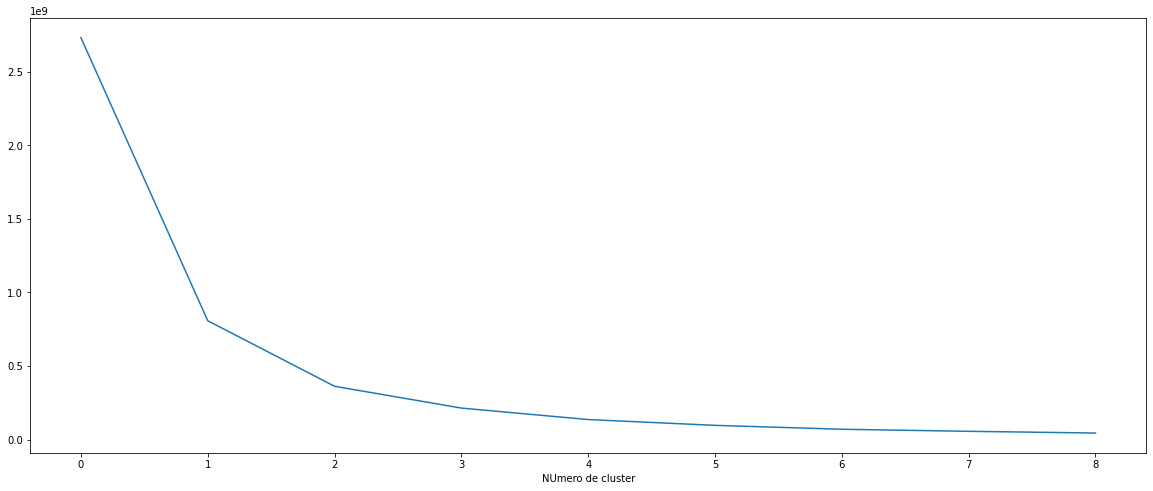

In [22]:
plt.figure(figsize=(20,8))
plt.plot(soma_quadrados)
plt.xlabel('NUmero de cluster')
plt.show()

# Regra Matemática da Cotovelo

---

Para se ter certeza da escolha do numero de clusters, usa-se a versão matematica da regra do cotovelo que busca a maior distancia entre a reta que liga as primeiras coordenadas do cluester 1 até as coordenadas do ultimo cluster  até a função de inercia dos clusters. 

Assim garantese a maior homogeneidade dentro dos clusters e a amaior diferença entre clusters.

In [23]:
import math
def numero_otimo_cluster(wcss):
  x1,y1 = 2, wcss[0]
  x2,y2 = 20, wcss[len(wcss)-1]

  distancia =[]
  for i in range(len(wcss)):
    x0 = i+2
    y0 = wcss[i]
    numerador = abs((y2-y1)*x0 - (x2-x1)*y0 +x2*y1 + y2*x1)
    denominador = math.sqrt((y2 - y1)**2 + (x2 -x1)**2)
    distancia.append(numerador/denominador)
  return distancia.index(max(distancia))+2


In [24]:
n = numero_otimo_cluster(soma_quadrados)
n

4

# Coeficiente de silhueta

---


In [25]:
from sklearn.metrics import silhouette_samples, silhouette_score
lista_score = []
for i in range(2, 11):
    clusterer = KMeans(n_clusters=i)
    preds = clusterer.fit_predict(df_recencia)
    score = silhouette_score(df_recencia, preds)
    lista_score.append(score)
    print('Silhueta para ' + str(i) + ' clusters : ' + str(score))


Silhueta para 2 clusters : 0.5984498123329334
Silhueta para 3 clusters : 0.5762802011313682
Silhueta para 4 clusters : 0.5576492846501057
Silhueta para 5 clusters : 0.5573539267514038
Silhueta para 6 clusters : 0.5590398652775929
Silhueta para 7 clusters : 0.5610952885024434
Silhueta para 8 clusters : 0.5540542977094917
Silhueta para 9 clusters : 0.559225477841938
Silhueta para 10 clusters : 0.5682618834074072


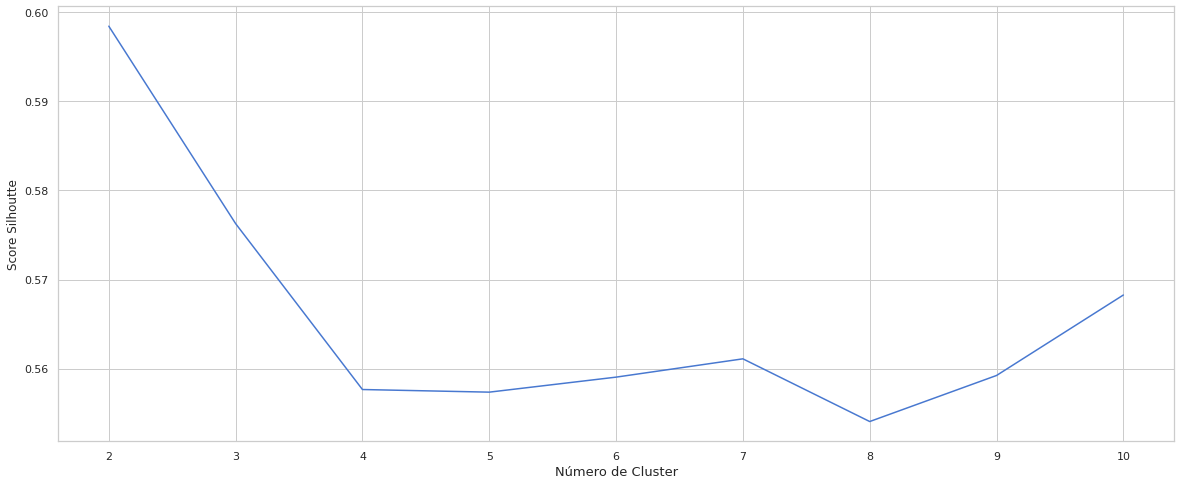

In [61]:
plt.figure(figsize=(20,8))
g1 = sns.lineplot(x=range(2,11), y= lista_score)
g1.set_ylabel('Score Silhoutte',fontsize=12)
g1.set_xlabel('Número de Cluster', fontsize=13)
plt.show()

# Clusterizando a Recência

---

In [27]:
kmeans = KMeans(n_clusters=4)
df_usuario['RecenciaCluster'] = kmeans.fit_predict(df_recencia)
df_usuario.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,Recencia,RecenciaCluster
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,474,1
1,9eae34bbd3a474ec5d07949ca7de67c0,8912fc0c3bbf1e2fbf35819e21706718,2017-11-09 00:50:13,1,112.99,298,3
2,9eae34bbd3a474ec5d07949ca7de67c0,8912fc0c3bbf1e2fbf35819e21706718,2017-11-09 00:50:13,2,112.99,298,3
3,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,483,1
4,23397e992b09769faf5e66f9e171a241,6bc8d08963a135220ed6c6d098831f84,2018-02-03 19:45:40,1,106.99,211,0


In [28]:
agrupado_por_cluster = df_usuario.groupby('RecenciaCluster')['Recencia'].mean().reset_index()
agrupado_por_cluster.head()

,RecenciaCluster,Recencia
0,0,187.911204
1,1,490.622269
2,2,66.790878
3,3,320.233294


In [29]:
agrupador_por_cluster_ordenado = agrupado_por_cluster.sort_values(by='Recencia',ascending = False).reset_index(drop=True)
agrupador_por_cluster_ordenado

,RecenciaCluster,Recencia
0,1,490.622269
1,3,320.233294
2,0,187.911204
3,2,66.790878


In [30]:
agrupador_por_cluster_ordenado['index'] = agrupador_por_cluster_ordenado.index
agrupador_por_cluster_ordenado

,RecenciaCluster,Recencia,index
0,1,490.622269,0
1,3,320.233294,1
2,0,187.911204,2
3,2,66.790878,3


In [31]:
juntando_cluster = pd.merge(df_usuario, agrupador_por_cluster_ordenado[['RecenciaCluster','index']], on = 'RecenciaCluster')
juntando_cluster.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,Recencia,RecenciaCluster,index
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,474,1,0
1,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,483,1,0
2,567ab47ca4deb92d46dbf54dce07d0a7,fd3a0b1bd209f0e7d420c9c3d1127613,2017-03-23 15:10:17,1,126.99,528,1,0
3,f40ab89b622248b7ca125af4b486b887,fbd40c083aa8cddebb5265b2ba6aaf2e,2017-05-16 10:00:49,1,124.99,474,1,0
4,749943913a9851a39c9baf51877fbab6,10558ef4afea173bfb5e2cbe3d5b0bb5,2017-03-18 23:04:36,1,126.99,533,1,0


In [32]:
removendo_dados = juntando_cluster.drop(['RecenciaCluster'], axis= 1)
removendo_dados.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,Recencia,index
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,474,0
1,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,483,0
2,567ab47ca4deb92d46dbf54dce07d0a7,fd3a0b1bd209f0e7d420c9c3d1127613,2017-03-23 15:10:17,1,126.99,528,0
3,f40ab89b622248b7ca125af4b486b887,fbd40c083aa8cddebb5265b2ba6aaf2e,2017-05-16 10:00:49,1,124.99,474,0
4,749943913a9851a39c9baf51877fbab6,10558ef4afea173bfb5e2cbe3d5b0bb5,2017-03-18 23:04:36,1,126.99,533,0


In [33]:
df_final = removendo_dados.rename(columns ={'index' : 'RecenciaCluster'} )
df_final.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,Recencia,RecenciaCluster
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,474,0
1,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,483,0
2,567ab47ca4deb92d46dbf54dce07d0a7,fd3a0b1bd209f0e7d420c9c3d1127613,2017-03-23 15:10:17,1,126.99,528,0
3,f40ab89b622248b7ca125af4b486b887,fbd40c083aa8cddebb5265b2ba6aaf2e,2017-05-16 10:00:49,1,124.99,474,0
4,749943913a9851a39c9baf51877fbab6,10558ef4afea173bfb5e2cbe3d5b0bb5,2017-03-18 23:04:36,1,126.99,533,0


In [34]:
def ordenador_cluster(cluster_nome, target_nome, df):
  agrupado_por_cluster = df.groupby(cluster_nome)[target_nome].mean().reset_index()
  agrupador_por_cluster_ordenado = agrupado_por_cluster.sort_values(by=target_nome, ascending = True).reset_index(drop=True)
  agrupador_por_cluster_ordenado['index'] = agrupador_por_cluster_ordenado.index
  juntando_cluster = pd.merge(df, agrupador_por_cluster_ordenado[[cluster_nome,'index']], on = cluster_nome)
  removendo_dados = juntando_cluster.drop([cluster_nome], axis= 1)
  df_final = removendo_dados.rename(columns ={'index' : cluster_nome} )
  return df_final

In [35]:
df_usuario = ordenador_cluster('RecenciaCluster','Recencia',df_usuario)

In [36]:
df_usuario.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,Recencia,RecenciaCluster
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,474,3
1,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,483,3
2,567ab47ca4deb92d46dbf54dce07d0a7,fd3a0b1bd209f0e7d420c9c3d1127613,2017-03-23 15:10:17,1,126.99,528,3
3,f40ab89b622248b7ca125af4b486b887,fbd40c083aa8cddebb5265b2ba6aaf2e,2017-05-16 10:00:49,1,124.99,474,3
4,749943913a9851a39c9baf51877fbab6,10558ef4afea173bfb5e2cbe3d5b0bb5,2017-03-18 23:04:36,1,126.99,533,3


In [37]:
df_usuario.groupby('RecenciaCluster')['Recencia'].describe()

,count,mean,std,min,25%,50%,75%,max
RecenciaCluster,,,,,,,,
0,31790.0,66.790878,36.009443,0.0,33.0,67.0,100.0,127.0
1,33639.0,187.911204,35.134736,128.0,158.0,187.0,218.0,254.0
2,30828.0,320.233294,43.971639,255.0,281.0,314.0,357.0,405.0
3,20324.0,490.622269,59.293154,406.0,444.0,481.0,533.0,728.0


#Clusterizando a Frequência

---


In [38]:
df_frequencia = df.groupby('id_unico_cliente').pedido_aprovado.count().reset_index()
df_frequencia.columns = ['id_unico_cliente','Frequencia']
df_frequencia.head()

,id_unico_cliente,Frequencia
0,0000366f3b9a7992bf8c76cfdf3221e2,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1
2,0000f46a3911fa3c0805444483337064,1
3,0000f6ccb0745a6a4b88665a16c9f078,1
4,0004aac84e0df4da2b147fca70cf8255,1


In [39]:
df_usuario = pd.merge(df_usuario,df_frequencia,on='id_unico_cliente')
df_usuario.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,Recencia,RecenciaCluster,Frequencia
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,474,3,1
1,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,483,3,1
2,567ab47ca4deb92d46dbf54dce07d0a7,fd3a0b1bd209f0e7d420c9c3d1127613,2017-03-23 15:10:17,1,126.99,528,3,1
3,f40ab89b622248b7ca125af4b486b887,fbd40c083aa8cddebb5265b2ba6aaf2e,2017-05-16 10:00:49,1,124.99,474,3,1
4,749943913a9851a39c9baf51877fbab6,10558ef4afea173bfb5e2cbe3d5b0bb5,2017-03-18 23:04:36,1,126.99,533,3,1


In [40]:
df_frequencia = df_usuario[['Frequencia']]
kmeans = KMeans(n_clusters=4)
df_usuario['FrequenciaCluster'] = kmeans.fit_predict(df_frequencia)

In [41]:
df_usuario.groupby('FrequenciaCluster')['Frequencia'].describe()

,count,mean,std,min,25%,50%,75%,max
FrequenciaCluster,,,,,,,,
0,106570.0,1.306343,0.570539,0.0,1.0,1.0,2.0,3.0
1,731.0,21.489740,6.588977,14.0,15.0,21.0,24.0,38.0
2,75.0,75.000000,0.000000,75.0,75.0,75.0,75.0,75.0
3,9205.0,5.644432,2.138491,4.0,4.0,5.0,6.0,13.0


In [42]:
df_usuario = ordenador_cluster('FrequenciaCluster','Frequencia',df_usuario)

In [43]:
df_usuario.groupby('FrequenciaCluster')['Frequencia'].describe()

,count,mean,std,min,25%,50%,75%,max
FrequenciaCluster,,,,,,,,
0,106570.0,1.306343,0.570539,0.0,1.0,1.0,2.0,3.0
1,9205.0,5.644432,2.138491,4.0,4.0,5.0,6.0,13.0
2,731.0,21.489740,6.588977,14.0,15.0,21.0,24.0,38.0
3,75.0,75.000000,0.000000,75.0,75.0,75.0,75.0,75.0


# Clusterizando a Receita

---


In [44]:
df_receita =  df.groupby('id_unico_cliente')['pagamento_valor'].sum().reset_index()
df_receita.columns = ['id_unico_cliente','Receita']
df_usuario = pd.merge(df_usuario,df_receita, on = 'id_unico_cliente')
df_usuario.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,Recencia,RecenciaCluster,Frequencia,FrequenciaCluster,Receita
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,474,3,1,0,146.87
1,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,483,3,1,0,140.61
2,567ab47ca4deb92d46dbf54dce07d0a7,fd3a0b1bd209f0e7d420c9c3d1127613,2017-03-23 15:10:17,1,126.99,528,3,1,0,142.05
3,f40ab89b622248b7ca125af4b486b887,fbd40c083aa8cddebb5265b2ba6aaf2e,2017-05-16 10:00:49,1,124.99,474,3,1,0,155.70
4,749943913a9851a39c9baf51877fbab6,10558ef4afea173bfb5e2cbe3d5b0bb5,2017-03-18 23:04:36,1,126.99,533,3,1,0,148.33


In [45]:
df_pagamento = df_usuario[['Receita']]
kmeans = KMeans(n_clusters = 4)
df_usuario['ReceitaCluster'] = kmeans.fit_predict(df_pagamento)

In [46]:
df_usuario = ordenador_cluster('ReceitaCluster','Receita',df_usuario)

In [47]:
df_usuario.groupby('ReceitaCluster')['Receita'].describe()

,count,mean,std,min,25%,50%,75%,max
ReceitaCluster,,,,,,,,
0,114904.0,261.485763,377.283592,9.59,69.90,132.82,270.00,3080.96
1,1478.0,5900.843911,2894.129234,3083.40,3798.75,4875.25,7315.92,16313.60
2,191.0,27358.656911,10032.832924,17069.76,19167.26,25051.89,30186.00,45256.00
3,8.0,109312.640000,0.000000,109312.64,109312.64,109312.64,109312.64,109312.64


In [48]:
df_usuario.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,Recencia,RecenciaCluster,Frequencia,FrequenciaCluster,Receita,ReceitaCluster
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,474,3,1,0,146.87,0
1,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,483,3,1,0,140.61,0
2,567ab47ca4deb92d46dbf54dce07d0a7,fd3a0b1bd209f0e7d420c9c3d1127613,2017-03-23 15:10:17,1,126.99,528,3,1,0,142.05,0
3,f40ab89b622248b7ca125af4b486b887,fbd40c083aa8cddebb5265b2ba6aaf2e,2017-05-16 10:00:49,1,124.99,474,3,1,0,155.70,0
4,749943913a9851a39c9baf51877fbab6,10558ef4afea173bfb5e2cbe3d5b0bb5,2017-03-18 23:04:36,1,126.99,533,3,1,0,148.33,0


# Criando pontuação para clientes

---


In [49]:
df_final = df_usuario[['id_unico_cliente','Recencia','RecenciaCluster','Frequencia','FrequenciaCluster','Receita','ReceitaCluster']]
df_final.head()

,id_unico_cliente,Recencia,RecenciaCluster,Frequencia,FrequenciaCluster,Receita,ReceitaCluster
0,861eff4711a542e4b93843c6dd7febb0,474,3,1,0,146.87,0
1,3c799d181c34d51f6d44bbbc563024db,483,3,1,0,140.61,0
2,567ab47ca4deb92d46dbf54dce07d0a7,528,3,1,0,142.05,0
3,f40ab89b622248b7ca125af4b486b887,474,3,1,0,155.70,0
4,749943913a9851a39c9baf51877fbab6,533,3,1,0,148.33,0


In [50]:
import sys
import warnings

if not sys.warnoptions:
  warnings.simplefilter('ignore')


df_final['Pontuação'] = df_usuario['RecenciaCluster'] + df_usuario['FrequenciaCluster']+df_usuario['ReceitaCluster']
df_final.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,id_unico_cliente,Recencia,RecenciaCluster,Frequencia,FrequenciaCluster,Receita,ReceitaCluster,Pontuação
0,861eff4711a542e4b93843c6dd7febb0,474,3,1,0,146.87,0,3
1,3c799d181c34d51f6d44bbbc563024db,483,3,1,0,140.61,0,3
2,567ab47ca4deb92d46dbf54dce07d0a7,528,3,1,0,142.05,0,3
3,f40ab89b622248b7ca125af4b486b887,474,3,1,0,155.70,0,3
4,749943913a9851a39c9baf51877fbab6,533,3,1,0,148.33,0,3


In [51]:
df_final['Pontuação'].max()

6

In [52]:
df_final['Segmento'] = 'Inativo'
df_final.loc[df_final['Pontuação']>=1, 'Segmento'] = 'Business'
df_final.loc[df_final['Pontuação']>=3, 'Segmento'] = 'Master'
df_final.loc[df_final['Pontuação']>=5, 'Segmento'] = 'Premium'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [53]:
df_final.tail()

,id_unico_cliente,Recencia,RecenciaCluster,Frequencia,FrequenciaCluster,Receita,ReceitaCluster,Pontuação,Segmento
116576,0a0a92112bd4c708ca5fde585afaa872,338,2,8,1,109312.64,3,6,Premium
116577,0a0a92112bd4c708ca5fde585afaa872,338,2,8,1,109312.64,3,6,Premium
116578,0a0a92112bd4c708ca5fde585afaa872,338,2,8,1,109312.64,3,6,Premium
116579,0a0a92112bd4c708ca5fde585afaa872,338,2,8,1,109312.64,3,6,Premium
116580,0a0a92112bd4c708ca5fde585afaa872,338,2,8,1,109312.64,3,6,Premium


In [54]:
df_final.to_csv('RFM.csv')

# Segunda análise visual

---

In [55]:
def plot_segmento(x,y,data):
  sns.set(palette = 'muted', color_codes = True, style = 'whitegrid')
  plt.figure(figsize=(20,8))
  sns.scatterplot(x=x,
                  y=y,
                  data=data,
                  hue='Segmento',
                  size='Segmento', 
                  sizes=(50,150),
                  size_order = ['Premium','Master','Business','Inativo'])
  plt.show()

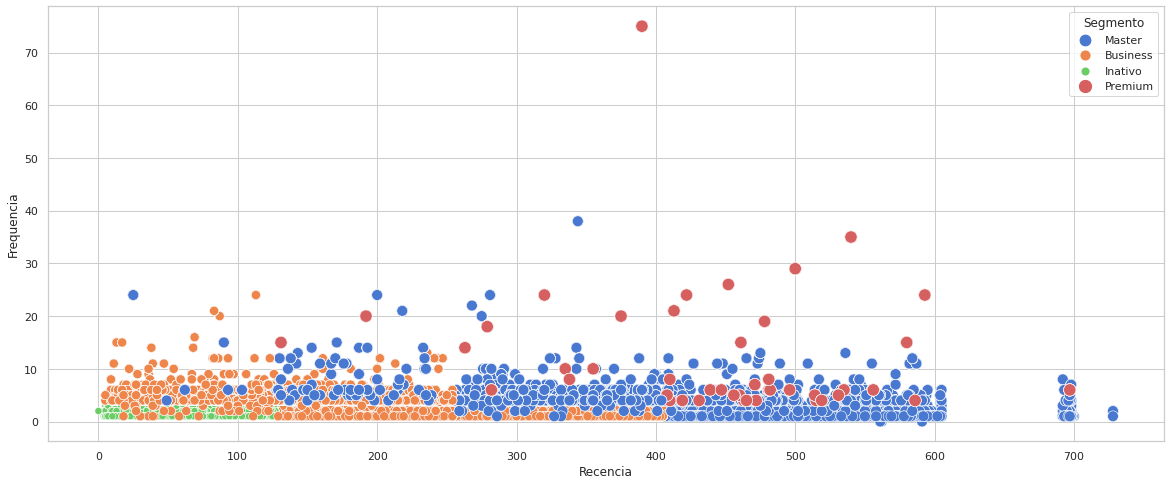

In [56]:
plot_segmento('Recencia','Frequencia',df_final)

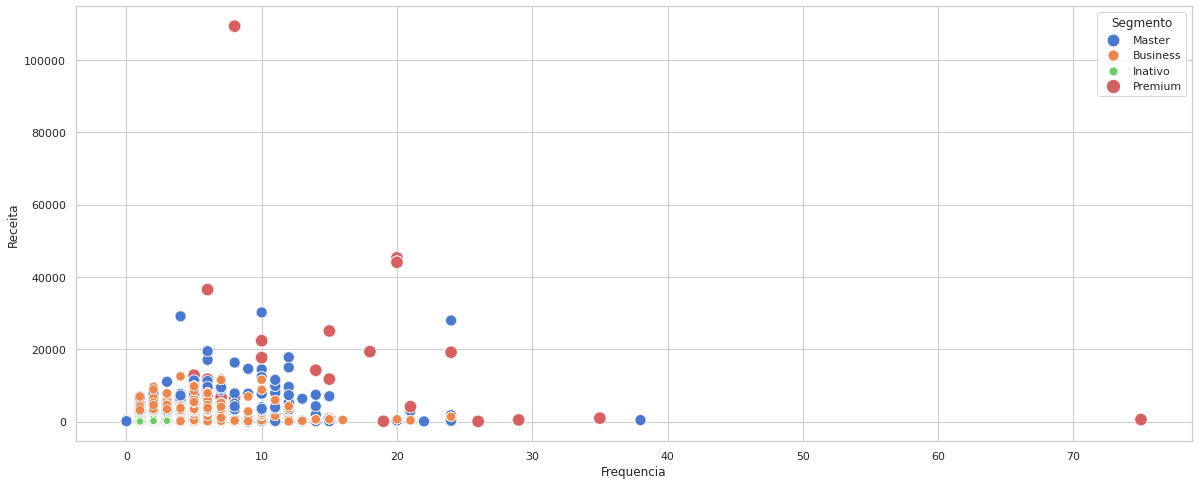

In [57]:
plot_segmento('Frequencia','Receita',df_final)

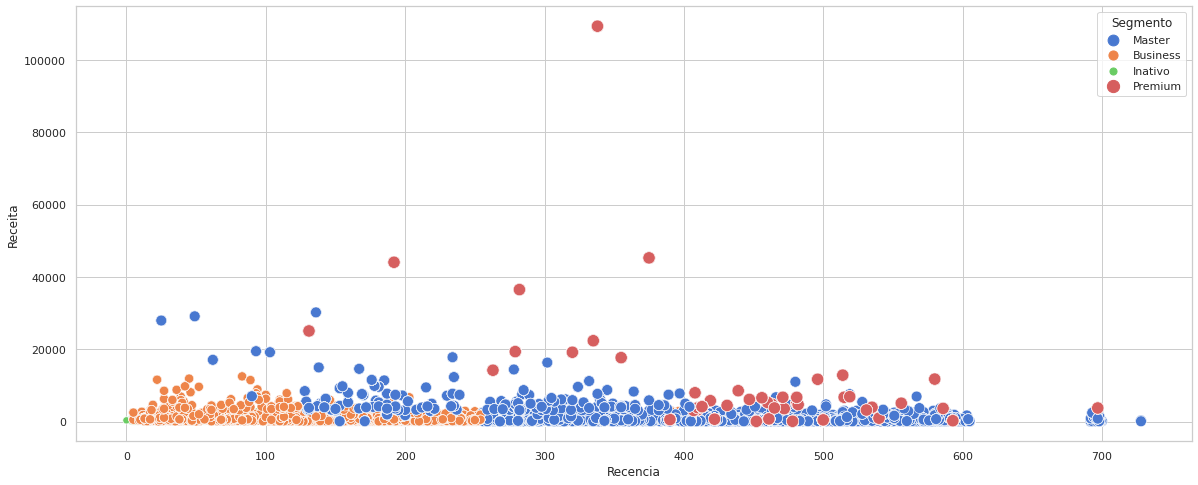

In [58]:
plot_segmento('Recencia','Receita',df_final)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


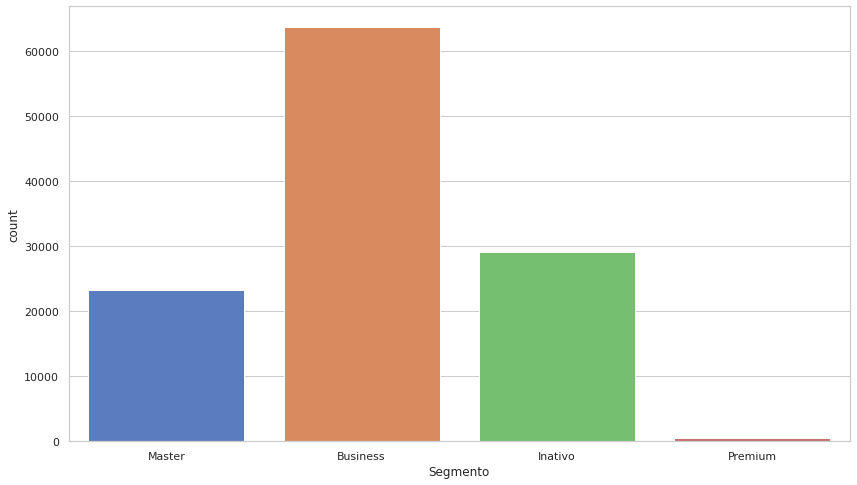

In [59]:
plt.figure(figsize=(14,8))
sns.countplot(df_final['Segmento'])

# Criando uma outra forma de pontuar os clientes

---

In [60]:
df_final.loc[(df_final['RecenciaCluster']==0) & (df_final['FrequenciaCluster']==3) & (df_final['ReceitaCluster']==3),'Segmento'] = 'Campeao'

df_final.loc[(df_final['RecenciaCluster']==1) & (df_final['FrequenciaCluster']==3) & (df_final['ReceitaCluster']==3),'Segmento'] = 'Fiel'

df_final.loc[(df_final['RecenciaCluster']==1) & (df_final['FrequenciaCluster']==2) & (df_final['ReceitaCluster']==2),'Segmento'] = 'Potencialmente Fiel - Tipo 1'

df_final.loc[(df_final['RecenciaCluster']==1) & (df_final['FrequenciaCluster']==1) & (df_final['ReceitaCluster']==3),'Segmento'] = 'Potencialmente Fiel - Tipo 2'

df_final.loc[(df_final['RecenciaCluster']==0) & (df_final['FrequenciaCluster']==0) & (df_final['ReceitaCluster']==0),'Segmento'] = 'Novos'

df_final.loc[(df_final['RecenciaCluster']==0) & (df_final['FrequenciaCluster']==1) & (df_final['ReceitaCluster']==1),'Segmento'] = 'Promissores'

df_final.loc[(df_final['RecenciaCluster']==2) & (df_final['FrequenciaCluster']==2) & (df_final['ReceitaCluster']==2),'Segmento'] = 'Precisam Atencao'

df_final.loc[(df_final['RecenciaCluster']==2) & (df_final['FrequenciaCluster']==1) & (df_final['ReceitaCluster']==1),'Segmento'] ='Quase em Risco'

df_final.loc[(df_final['RecenciaCluster']==3) & (df_final['FrequenciaCluster']==2) & (df_final['ReceitaCluster']==2),'Segmento'] ='Risco'

df_final.loc[(df_final['RecenciaCluster']==3) & (df_final['FrequenciaCluster']==3) & (df_final['ReceitaCluster']==3),'Segmento'] ='Nao pode perder - Tipo 1'

df_final.loc[(df_final['RecenciaCluster']==3) & (df_final['FrequenciaCluster']==1) & (df_final['ReceitaCluster']==1),'Segmento'] ='Hibernando'

df_final.loc[(df_final['RecenciaCluster']==3) & (df_final['FrequenciaCluster']==0) & (df_final['ReceitaCluster']==0),'Segmento'] ='Perdidos'

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [62]:
df_final.head()

,id_unico_cliente,Recencia,RecenciaCluster,Frequencia,FrequenciaCluster,Receita,ReceitaCluster,Pontuação,Segmento
0,861eff4711a542e4b93843c6dd7febb0,474,3,1,0,146.87,0,3,Perdidos
1,3c799d181c34d51f6d44bbbc563024db,483,3,1,0,140.61,0,3,Perdidos
2,567ab47ca4deb92d46dbf54dce07d0a7,528,3,1,0,142.05,0,3,Perdidos
3,f40ab89b622248b7ca125af4b486b887,474,3,1,0,155.70,0,3,Perdidos
4,749943913a9851a39c9baf51877fbab6,533,3,1,0,148.33,0,3,Perdidos


In [63]:
df_final.tail()

,id_unico_cliente,Recencia,RecenciaCluster,Frequencia,FrequenciaCluster,Receita,ReceitaCluster,Pontuação,Segmento
116576,0a0a92112bd4c708ca5fde585afaa872,338,2,8,1,109312.64,3,6,Premium
116577,0a0a92112bd4c708ca5fde585afaa872,338,2,8,1,109312.64,3,6,Premium
116578,0a0a92112bd4c708ca5fde585afaa872,338,2,8,1,109312.64,3,6,Premium
116579,0a0a92112bd4c708ca5fde585afaa872,338,2,8,1,109312.64,3,6,Premium
116580,0a0a92112bd4c708ca5fde585afaa872,338,2,8,1,109312.64,3,6,Premium


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


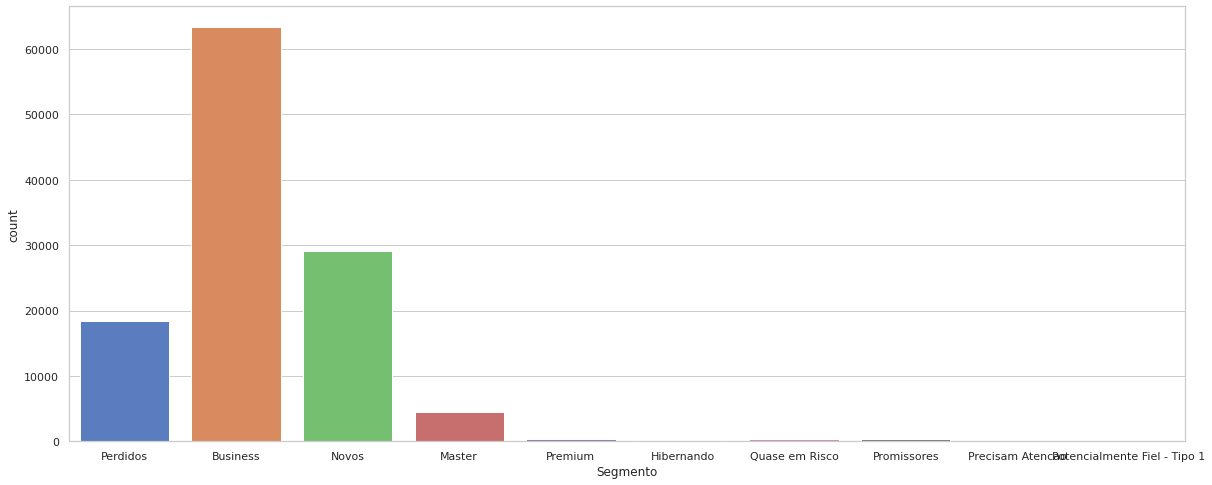

In [66]:
plt.figure(figsize=(20,8))
sns.countplot(df_final['Segmento'])